<a href="https://colab.research.google.com/github/shamabansal17/Logistics-co.-Business-Analysis/blob/main/delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


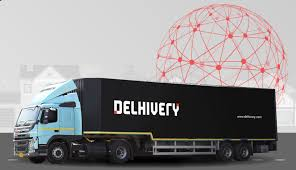



# <font size='8' color='skyblue'> *DELHIVERY- case study*</font>
> ## <font color='skyblue'>   *analyzed by-Shama Bansal*</font>

<font size='6' color='skyblue'> *About Delhivery*</font><br>
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

<font size='6' color='skyblue'> *Problem Statement*</font><br>

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

It wants to understand and process the data coming out of data engineering pipelines. So we need to

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

• Detectiong outliers to refine the process of delivry and enhance the quality of services.


## <font color='skyblue'>*Benefits of case study*</font>
From Delhivery’s Perspective: <br>
● It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals:<br>
 ● First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately. <br>
 ● Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models.<br> ● Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.<br> ● By conducting hypothesis testing and outlier detection, Delhivery can refine their processes and further enhance the quality of service they provide.<br><br>






### <font color='skyblue'>*Importing necessary Libraries*</font>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

### <font color='skyblue'> *Downloading Dataset*</font>

In [ ]:
!gdown 1Rr38ickcD_qawNf2WrFVUVEsFo2oFEnb

Downloading...
From: https://drive.google.com/uc?id=1Rr38ickcD_qawNf2WrFVUVEsFo2oFEnb
To: /content/delhivery_dat.csv
100% 55.6M/55.6M [00:00<00:00, 67.6MB/s]


### <font color='skyblue'>*Reading Dataset*</font>

In [ ]:
dlvry_df=pd.read_csv('delhivery_dat.csv')
dlvry_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### <font color='skyblue'>*Checking Data Structure and its attributes*</font>

In [ ]:
print(f'Rows of data: {dlvry_df.shape[0]}\nColumns of data: {dlvry_df.shape[1]}')

Rows of data: 144867
Columns of data: 24


In [ ]:
dlvry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

There are 10 float columns, 1 bool , 1 int and 12 object datatype columns which needs to be checked.

### <font color='skyblue'>*Checking Duplicate Values*</font>

In [ ]:
dlvry_df.duplicated().value_counts()

False    144867
Name: count, dtype: int64

No duplicate values are given in the dataset.
<br><br>
### <font color='skyblue'>*Changing Datatypes*</font>

As we can see the columns like **trip_creation_time** , **od_start_time** , **od_end_time** are datetime columns but given as object dtype, so changing them to <font color='skyblue'> datetime </font> datatype.


In [ ]:
dlvry_df['trip_creation_time'] = pd.to_datetime(dlvry_df['trip_creation_time'])
dlvry_df['od_start_time']=pd.to_datetime(dlvry_df['od_start_time'])
dlvry_df['od_end_time']=pd.to_datetime(dlvry_df['od_end_time'])

To check if various columns which are given as float datatype have int data  or decimal/float data.

In [ ]:
(dlvry_df['start_scan_to_end_scan'].astype('int')==  dlvry_df['start_scan_to_end_scan']).value_counts()

start_scan_to_end_scan
True    144867
Name: count, dtype: int64

In [ ]:
(dlvry_df['actual_time'].astype('int')==  dlvry_df['actual_time']).value_counts()

actual_time
True    144867
Name: count, dtype: int64

In [ ]:
(dlvry_df['osrm_time'].astype('int')==  dlvry_df['osrm_time']).value_counts()

osrm_time
True    144867
Name: count, dtype: int64

In [ ]:
(dlvry_df['segment_actual_time'].astype('int')==  dlvry_df['segment_actual_time']).value_counts()

segment_actual_time
True    144867
Name: count, dtype: int64

In [ ]:
(dlvry_df['segment_osrm_time'].astype('int')==  dlvry_df['segment_osrm_time']).value_counts()

segment_osrm_time
True    144867
Name: count, dtype: int64

As we have seen that all these 5 columns are having int data only so can converting them to <font color='skyblue'>**int**</font> datatype.

In [ ]:
col_int=['start_scan_to_end_scan','actual_time','osrm_time','segment_actual_time','segment_osrm_time']
for col in col_int:
  dlvry_df[col]=dlvry_df[col].astype('int')

Coverting column **data** and **route_type** to <font color='skyblue'> Category</font> datatype.

In [ ]:
dlvry_df['data']=dlvry_df['data'].astype('category')
dlvry_df['route_type']=dlvry_df['route_type'].astype('category')

In [ ]:
# @title Lets check the datatypes of columns again
dlvry_df.dtypes

data                                    category
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                     int64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                          object
actual_distance_to_destination           float64
actual_time                                int64
osrm_time                                  int64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

### <font color='skyblue'>*Checking Missing Values*</font>


In [ ]:
round(dlvry_df.isnull().sum()/dlvry_df.shape[0]*100,2)

data                              0.00
trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
is_cutoff                         0.00
cutoff_factor                     0.00
cutoff_timestamp                  0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
factor                            0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
segment_factor                    0.00
dtype: float64

### <font color='skyblue'>*Treating Missing Values*</font>


In [ ]:
# Checking  if the missing name are there in other rows corresponding to source center or destination center
unknwn_source_code=dlvry_df[dlvry_df['source_name'].isnull()]['source_center'].unique()
unknwn_source_code

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
for code in unknwn_source_code:
  if code in dlvry_df[~dlvry_df['source_name'].isnull()]['source_center'].unique():
    print(code,': Found')
  elif code in dlvry_df[~dlvry_df['destination_name'].isnull()]['destination_center'].unique() :
    print(code,':  found')
  else:
    print(code,': Not Found')

IND342902A1B : Not Found
IND577116AAA : Not Found
IND282002AAD : Not Found
IND465333A1B : Not Found
IND841301AAC : Not Found
IND509103AAC : Not Found
IND126116AAA : Not Found
IND331022A1B : Not Found
IND505326AAB : Not Found
IND852118A1B : Not Found


In [ ]:
unknwn_dest_code=dlvry_df[dlvry_df['destination_name'].isnull()]['destination_center'].unique()
unknwn_dest_code

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:

for code in unknwn_dest_code:
  if code in dlvry_df[~dlvry_df['source_name'].isnull()]['source_center'].unique():
    print(code,': Found')
  elif code in dlvry_df[~dlvry_df['destination_name'].isnull()]['destination_center'].unique() :
    print(code,':  found')
  else:
    print(code,': Not Found')

IND342902A1B : Not Found
IND577116AAA : Not Found
IND282002AAD : Not Found
IND465333A1B : Not Found
IND841301AAC : Not Found
IND505326AAB : Not Found
IND852118A1B : Not Found
IND126116AAA : Not Found
IND509103AAC : Not Found
IND221005A1A : Not Found
IND250002AAC : Not Found
IND331001A1C : Not Found
IND122015AAC : Not Found


### <font color='skyblue'>*Filling Missing Values*</font>


In [ ]:
# Filling missing values with corresponding center code and unknown to not to get them mixed with others
for code in unknwn_source_code:
  dlvry_df.loc[dlvry_df['source_center']==code,'source_name']= dlvry_df.loc[dlvry_df['source_center']==code,'source_name'].fillna(code+'_unknownsource')


In [ ]:
for code in unknwn_dest_code:
  dlvry_df.loc[dlvry_df['destination_center']==code,'destination_name']= dlvry_df.loc[dlvry_df['destination_center']==code,'destination_name'].fillna(code+'_unknownsdest')

In [ ]:
dlvry_df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

Woah! No more missing values!

In [ ]:
# @title Finding the time period for which data is available
print(f"Data is given from [{dlvry_df['trip_creation_time'].min()}] to [{dlvry_df['od_end_time'].max()}] time period.")

Data is given from [2018-09-12 00:00:16.535741] to [2018-10-08 03:00:24.353479] time period.


### <font color='skyblue'>*Checking Unique Values*</font>


In [ ]:
for col in dlvry_df:
  print(f"Unique values for {col:<40}:{dlvry_df[col].nunique()}")

Unique values for data                                    :2
Unique values for trip_creation_time                      :14817
Unique values for route_schedule_uuid                     :1504
Unique values for route_type                              :2
Unique values for trip_uuid                               :14817
Unique values for source_center                           :1508
Unique values for source_name                             :1508
Unique values for destination_center                      :1481
Unique values for destination_name                        :1481
Unique values for od_start_time                           :26369
Unique values for od_end_time                             :26369
Unique values for start_scan_to_end_scan                  :1915
Unique values for is_cutoff                               :2
Unique values for cutoff_factor                           :501
Unique values for cutoff_timestamp                        :93180
Unique values for actual_distance_to_destinat

### <font color='skyblue'>*Dropping irrelavant columns*</font>


In [ ]:
dlvry_df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace=True)

# I am not able to find any usage of these column so dropping them


### <font color='skyblue'>*Statistical Summary*</font>

In [ ]:
dlvry_df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370
std,NaN,NaN,NaN,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066


As I came to know there is negative values in **segment_actual_time** column,which is not possible to have negative time for deliveries so we need to clean that too. So, I am that the negative values are putted by mistake.

In [ ]:
dlvry_df['segment_actual_time']=dlvry_df['segment_actual_time'].abs()

In [ ]:
dlvry_df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,234.073372,416.927527,213.868272,284.771297,36.208246,18.507548,22.82902
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,0.000000,0.000000,0.00000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370
std,NaN,NaN,NaN,1037.012769,344.990009,598.103621,308.011085,421.119294,53.562957,14.775960,17.86066


In [ ]:
dlvry_df.describe(include=object)


,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1508,1481,1481
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


- The trip creation time is from 12 september, 2018 to 03 October, 2018, while the trip start time is given till 06-October, 2018 and end time is till 08 Oct,2018.
- The average time taken for deliveries is 961 minutes that is near to 16 hours hile the maximum is 7898 hours which is near to 5-6 days and min is 20 minutes only. The median is quite low than mean showing presence of many outliers.
- Outliers detection in actual_distance_to_destination,actual_time,osrm_time,osrm_distance too.
- The min distance is 9 km while the max is 1927 km.
- The actual time taken for a delivery is as low as 9 min and as high as 4532 mins which is very high as orsm maximum time is only 1686 min means taken 2 days extra for a delivery which is not a good sign.
- The osrm max distance is 2326 while in actually we took short distance as max actual distance is only 1927 ,which can be a good sign if time taken is also less.
- Only 1504 unique route ids shows deliveries are repeated at same routes as 1812 times to a single route in a period of less than 30 days is surely a good thing.
-  same trip_uuid is repeated 101 times shows its not a good sign to send so many deliveries in between as will lead to late deliveries.
- Most deliveries are from Gurgaon and to Gurgaon, haryana too. though for source it is more in number.

In [ ]:
# didnot understood the use of cumsum here as ultimately we have to do sum of all so why to show them as non aggregated data.
# we are not dealing with intermediate deliveries in our study so not making sense to me still did to show only as per doc.
dlvry_df['segment']=dlvry_df['trip_uuid']+'_'+dlvry_df['source_center']+'_'+dlvry_df['destination_center']

In [ ]:
segment_col=['segment_actual_time','segment_osrm_time','segment_osrm_distance']
for col in segment_col:
  dlvry_df[col+'_sum']=dlvry_df.groupby('segment')[col].cumsum()
dlvry_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14,11,11.9653,14,11,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14,11,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24,20,21.7243,10,9,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24,20,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40,28,32.5395,16,7,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40,27,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62,40,45.5620,21,12,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61,39,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68,44,54.2181,6,5,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67,44,49.4772


### <font color='skyblue'>*Aggregating Data*</font>


In [ ]:
dlvry_df[dlvry_df['trip_uuid']=='trip-153784572117438961'].iloc[:,4:15]

,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time
38244,trip-153784572117438961,IND370110AAA,Anjar_DC (Gujarat),IND370001AAA,Bhuj_DC (Gujarat),2018-09-25 05:03:56.307061,2018-09-25 06:07:34.010850,63,22.478705,35,16
38245,trip-153784572117438961,IND370110AAA,Anjar_DC (Gujarat),IND370001AAA,Bhuj_DC (Gujarat),2018-09-25 05:03:56.307061,2018-09-25 06:07:34.010850,63,35.248106,53,26
38246,trip-153784572117438961,IND370001AAA,Bhuj_DC (Gujarat),IND370110AAA,Anjar_DC (Gujarat),2018-09-25 06:07:34.010850,2018-09-25 16:48:34.899468,641,23.143185,30,17
38247,trip-153784572117438961,IND370001AAA,Bhuj_DC (Gujarat),IND370110AAA,Anjar_DC (Gujarat),2018-09-25 06:07:34.010850,2018-09-25 16:48:34.899468,641,35.772718,151,28
38248,trip-153784572117438961,IND370110AAA,Anjar_DC (Gujarat),IND370615AAB,Nakhatrana_ClgRDDPP_D (Gujarat),2018-09-25 16:48:34.899468,2018-09-26 05:55:26.825993,786,22.770527,32,23
38249,trip-153784572117438961,IND370110AAA,Anjar_DC (Gujarat),IND370615AAB,Nakhatrana_ClgRDDPP_D (Gujarat),2018-09-25 16:48:34.899468,2018-09-26 05:55:26.825993,786,45.144609,107,49
38250,trip-153784572117438961,IND370110AAA,Anjar_DC (Gujarat),IND370615AAB,Nakhatrana_ClgRDDPP_D (Gujarat),2018-09-25 16:48:34.899468,2018-09-26 05:55:26.825993,786,67.504708,140,65
38251,trip-153784572117438961,IND370110AAA,Anjar_DC (Gujarat),IND370615AAB,Nakhatrana_ClgRDDPP_D (Gujarat),2018-09-25 16:48:34.899468,2018-09-26 05:55:26.825993,786,78.220649,153,73
38252,trip-153784572117438961,IND370615AAB,Nakhatrana_ClgRDDPP_D (Gujarat),IND370001AAA,Bhuj_DC (Gujarat),2018-09-26 05:55:26.825993,2018-09-26 13:29:52.138158,454,36.468365,449,39
38253,trip-153784572117438961,IND370001AAA,Bhuj_DC (Gujarat),IND370110AAA,Anjar_DC (Gujarat),2018-09-26 13:29:52.138158,2018-09-26 16:53:38.319719,203,23.987211,29,17


As we can see there are trip ids where same source is repeated twice and destination too at different time so it gives wrong analysis if we take first for time for samesource and last time for destiantion so using group by for start time too to aggregate data.

In [ ]:
# checking if group by working fine on a single trip id
df1=dlvry_df[dlvry_df['trip_uuid']=='trip-153741093647649320']
df1

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14,11,11.9653,14,11,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14,11,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24,20,21.7243,10,9,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24,20,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40,28,32.5395,16,7,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40,27,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62,40,45.5620,21,12,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61,39,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68,44,54.2181,6,5,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67,44,49.4772
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,15,11,12.1171,15,11,12.1171,trip-153741093647649320_IND388620AAB_IND388320AAA,15,11,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,44,17,21.2890,28,6,9.1719,trip-153741093647649320_IND388620AAB_IND388320AAA,43,17,21.2890
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,65,29,35.8252,21,11,14.5362,trip-153741093647649320_IND388620AAB_IND388320AAA,64,28,35.8252
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,76,39,47.1900,10,10,11.3648,trip-153741093647649320_IND388620AAB_IND388320AAA,74,38,47.1900
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,102,45,53.2334,26,6,6.0434,trip-153741093647649320_IND388620AAB_IND388320AAA,100,44,53.2334


In [ ]:
agg_col={'data':'first',
         'trip_creation_time':'first',
        'route_schedule_uuid':'unique',
         'route_type':'first',
         'source_name':'first',
         'destination_name':'last',
         'od_end_time':'max',
       'start_scan_to_end_scan':'last',
       'actual_distance_to_destination':'last',
         'actual_time':'last',
         'osrm_time':'last',
         'osrm_distance':'max',
       'segment_actual_time':'sum',
       'segment_osrm_time':'sum',
        'segment_osrm_distance':'sum'}

In [ ]:
df2=df1.groupby(['trip_uuid','source_center','destination_center','od_start_time']).agg(agg_col).reset_index()
df2

,trip_uuid,source_center,destination_center,od_start_time,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,training,2018-09-20 02:35:36.476840,[thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c...,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45.236797,86,39.386040,68,44,54.2181,67,44,49.4772
1,trip-153741093647649320,IND388620AAB,IND388320AAA,2018-09-20 04:47:45.236797,training,2018-09-20 02:35:36.476840,[thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c...,Carting,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 06:36:55.627764,109,43.595802,102,45,53.2334,100,44,53.2334


In [ ]:
# Lets find out the differnece between start and end time before aggregating the real data to fullest as wont give
# accurate results after aggregationg as there are some instances where end time after destination doesnt matches with next start time
df2['od_time_diff_min']=(df2['od_end_time']-df2['od_start_time']).dt.total_seconds()/60


In [ ]:
agg_col_combine={'data':'first',
        'trip_creation_time':'first',
        'route_schedule_uuid':'first',
         'route_type':'first',
         'source_center':'first',
          'source_name':'first',
         'destination_center':'last',
          'destination_name':'last',
          'od_start_time':'min',
         'od_end_time':'max',
        'od_time_diff_min':'sum',
       'start_scan_to_end_scan':'sum',
       'actual_distance_to_destination':'sum',
         'actual_time':'sum',
         'osrm_time':'sum',
         'osrm_distance':'sum',
       'segment_actual_time':'sum',
       'segment_osrm_time':'sum',
        'segment_osrm_distance':'sum'}

In [ ]:
df2.groupby('trip_uuid').agg(agg_col_combine)

,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,od_time_diff_min,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
trip_uuid,,,,,,,,,,,,,,,,,,,
trip-153741093647649320,training,2018-09-20 02:35:36.476840,[thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 06:36:55.627764,195.386819,195,82.981842,170,89,107.4515,167,88,102.7106


In [ ]:
# performing aggregation on whole data
df_intermediate=dlvry_df.groupby(['trip_uuid','source_center','destination_center','od_start_time']).agg(agg_col).reset_index()
df_intermediate=df_intermediate.sort_values(by=['trip_uuid','od_end_time'],ascending=True)
df_intermediate

,trip_uuid,source_center,destination_center,od_start_time,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,training,2018-09-12 00:00:16.535741,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,999,440.973689,830,388,544.8027,820,474,649.8528
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 16:39:46.858469,training,2018-09-12 00:00:16.535741,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-13 13:40:23.123744,1260,383.759164,732,329,446.5496,728,534,670.6205
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,training,2018-09-12 00:00:22.886430,[thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,122,48.542890,96,42,56.9116,95,39,55.9899
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 02:03:09.655591,training,2018-09-12 00:00:22.886430,[thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 03:01:59.598855,58,24.644021,47,26,28.1994,46,26,28.1995
5,trip-153671043369099517,IND562132AAA,IND000000ACB,2018-09-12 00:00:33.691250,training,2018-09-12 00:00:33.691250,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,3099,1689.964663,2736,1528,2090.8743,2700,1710,2227.5270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26364,trip-153861115439069069,IND628204AAA,IND627657AAA,2018-10-04 02:29:04.272194,test,2018-10-03 23:59:14.390954,[thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 03:31:11.183797,62,33.627182,51,41,42.5213,49,42,42.1431
26363,trip-153861115439069069,IND627657AAA,IND628613AAA,2018-10-04 03:31:11.183797,test,2018-10-03 23:59:14.390954,[thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6...,Carting,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-04 04:16:39.894872,45,17.373209,33,31,25.7087,32,30,25.7087
26365,trip-153861115439069069,IND628613AAA,IND627005AAA,2018-10-04 04:16:39.894872,test,2018-10-03 23:59:14.390954,[thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 05:47:45.162682,91,33.673835,90,48,40.6080,89,77,78.5869
26368,trip-153861118270144424,IND583201AAA,IND583119AAA,2018-10-04 02:51:44.712656,test,2018-10-03 23:59:42.701692,[thanos::sroute:412fea14-6d1f-4222-8a5f-a51704...,FTL,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-04 03:58:40.726547,66,25.534793,42,26,28.0484,41,25,28.0484


In [ ]:
df_intermediate['od_time_diff_min']=round((df_intermediate['od_end_time']-df_intermediate['od_start_time']).dt.total_seconds()/60)

In [ ]:
df=df_intermediate.groupby('trip_uuid').agg(agg_col_combine).reset_index()
df

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,od_time_diff_min,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2261.0,2259,824.732854,1562,717,991.3523,1548,1008,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,[thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,182.0,180,73.186911,143,68,85.1110,141,65,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3935.0,3933,1927.404273,3347,1740,2372.0852,3308,1941,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,[thanos::sroute:f0176492-a679-4597-8332-bbd1c7...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,100,17.175274,59,15,19.6800,59,16,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,[thanos::sroute:d9f07b12-65e0-4f3b-bec8-df0613...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,719.0,717,127.448500,341,117,146.7918,340,115,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,[thanos::sroute:8a120994-f577-4491-9e4b-b7e4a1...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,258.0,257,57.762332,83,62,73.4630,82,62,64.8551
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,[thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b7576...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,61.0,60,15.513784,21,12,16.0882,21,11,16.0883
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,[thanos::sroute:5609c268-e436-4e0a-8180-3db4a7...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,422.0,421,38.684839,282,48,63.2841,281,88,104.8866
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,[thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,348.0,347,134.723836,264,179,177.6635,258,221,223.5324


In [ ]:
dlvry_df['trip_uuid'].nunique()

14817

We got the 14817 rows after aggregation based on trip uuid which is same as trip unique ids, which shows our aggregation is perfect.

In [ ]:
df[~(df['od_time_diff_min']-df['start_scan_to_end_scan']<=6)]
# tried various values here to get maximum difference

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,od_time_diff_min,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


From the above code we can see that the given start to end scan column have similar data to the column we featured by subtracting start time from end time. so we can drop any of them.
<br>
As we have source name and destination name, their codes name are not needed for analysis.

In [ ]:
df.drop(columns=['od_time_diff_min','source_center','destination_center'],inplace=True)

### <font color='skyblue'>*Splitting Columns to get features*</font>


In [ ]:
# Functions to split data
def ext_state(col):
  state=col.split(' (')[-1]
  if len(state)>1:
    return state[:-1]
  else:
    return col

def ext_city(col):
  city=col.split("_")
  if len(city)>1:      # handling exception cases
    return city[0]
  else:
    city=col.split()
    if len(city)>1:
      return city[0]
    else:
      return col            # handling missing data values

def ext_place(col):
  place=col.split("_")
  if len(place)>2:
    return place[1]
  elif len(place)>1:
    return place[0]
  else:
    place=col.split()
    if len(place)>2:
      return place[1]
    else:
      return place[0]

In [ ]:
df['source_state']=df['source_name'].apply(lambda x:ext_state(x))
df['source_city']=df['source_name'].apply(lambda x:ext_city(x))
df['source_place']=df['source_name'].apply(lambda x:ext_place(x))
df['destination_state']=df['destination_name'].apply(lambda x:ext_state(x))
df['destination_city']=df['destination_name'].apply(lambda x:ext_city(x))
df['destination_place']=df['destination_name'].apply(lambda x:ext_place(x))
df.iloc[:,10:]

,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place
0,824.732854,1562,717,991.3523,1548,1008,1320.4733,Madhya Pradesh,Bhopal,Trnsport,Haryana,Gurgaon,Bilaspur
1,73.186911,143,68,85.1110,141,65,84.1894,Karnataka,Tumkur,Veersagr,Karnataka,Chikblapur,ShntiSgr
2,1927.404273,3347,1740,2372.0852,3308,1941,2545.2678,Karnataka,Bangalore,Nelmngla,Punjab,Chandigarh,Mehmdpur
3,17.175274,59,15,19.6800,59,16,19.8766,Maharashtra,Mumbai,Hub,Maharashtra,Mumbai,MiraRd
4,127.448500,341,117,146.7918,340,115,146.7919,Karnataka,Bellary,Bellary,Karnataka,Bellary,Bellary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,57.762332,83,62,73.4630,82,62,64.8551,Punjab,Chandigarh,Mehmdpur,Punjab,Chandigarh,Mehmdpur
14813,15.513784,21,12,16.0882,21,11,16.0883,Haryana,FBD,Balabhgarh,Haryana,Faridabad,Blbgarh
14814,38.684839,282,48,63.2841,281,88,104.8866,Uttar Pradesh,Kanpur,Central,Uttar Pradesh,Kanpur,Central
14815,134.723836,264,179,177.6635,258,221,223.5324,Tamil Nadu,Tirunelveli,VdkkuSrt,Tamil Nadu,Tirunelveli,VdkkuSrt


In [ ]:

df['trip_hour']=df['trip_creation_time'].dt.hour
df['trip_day']=df['trip_creation_time'].dt.day
df['trip_month']=df['trip_creation_time'].dt.month
df['trip_week']=df['trip_creation_time'].dt.isocalendar().week
df['trip_weekday']=df['trip_creation_time'].dt.dayofweek
df.iloc[:50,15:]

,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place,trip_hour,trip_day,trip_month,trip_week,trip_weekday
0,1008,1320.4733,Madhya Pradesh,Bhopal,Trnsport,Haryana,Gurgaon,Bilaspur,0,12,9,37,2
1,65,84.1894,Karnataka,Tumkur,Veersagr,Karnataka,Chikblapur,ShntiSgr,0,12,9,37,2
2,1941,2545.2678,Karnataka,Bangalore,Nelmngla,Punjab,Chandigarh,Mehmdpur,0,12,9,37,2
3,16,19.8766,Maharashtra,Mumbai,Hub,Maharashtra,Mumbai,MiraRd,0,12,9,37,2
4,115,146.7919,Karnataka,Bellary,Bellary,Karnataka,Bellary,Bellary,0,12,9,37,2
5,23,28.0647,Tamil Nadu,Chennai,Porur,Tamil Nadu,Chennai,Sriperumbudur,0,12,9,37,2
6,13,12.0184,Tamil Nadu,Chennai,Chrompet,Tamil Nadu,Chennai,Vandalur,0,12,9,37,2
7,34,28.9203,Karnataka,HBR,Layout,Karnataka,HBR,Layout,0,12,9,37,2
8,29,30.9358,Gujarat,Surat,Central,Gujarat,Surat,Central,0,12,9,37,2
9,14,16.0860,Delhi,Delhi,Lajpat,Delhi,Delhi,Delhi,0,12,9,37,2


In [ ]:
# dropping columns which are no more useful as extracted data from them into various other columns
df.drop(columns=['trip_creation_time','route_schedule_uuid','source_name','destination_name','trip_uuid','od_start_time','od_end_time'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   data                            14817 non-null  category
 1   route_type                      14817 non-null  category
 2   start_scan_to_end_scan          14817 non-null  int64   
 3   actual_distance_to_destination  14817 non-null  float64 
 4   actual_time                     14817 non-null  int64   
 5   osrm_time                       14817 non-null  int64   
 6   osrm_distance                   14817 non-null  float64 
 7   segment_actual_time             14817 non-null  int64   
 8   segment_osrm_time               14817 non-null  int64   
 9   segment_osrm_distance           14817 non-null  float64 
 10  source_state                    14817 non-null  object  
 11  source_city                     14817 non-null  object  
 12  source_place      

We can see after cleaning, aggregating and handling data, data space is optimized from 25+ MB to approx. 2 MB only.

## <font color='skyblue'>*EXPLORATORY DATA ANALYSIS*</font>


In [ ]:
df['data'].value_counts()/len(df)*100

data
training    71.903894
test        28.096106
Name: count, dtype: float64

In [ ]:
df['route_type'].value_counts()/len(df)*100


route_type
Carting    60.120132
FTL        39.879868
Name: count, dtype: float64

In [ ]:
temp=df['start_scan_to_end_scan'].value_counts()
temp.sort_index(ascending=False).head(20)

start_scan_to_end_scan
7898    1
7458    1
6495    1
5864    1
5807    1
5688    1
5686    1
4846    1
4699    1
4616    1
4562    1
4535    1
4488    1
4475    1
4467    1
4461    1
4440    1
4410    2
4395    1
4384    1
Name: count, dtype: int64

In [ ]:
df['source_state'].value_counts()


source_state
Maharashtra                  2682
Karnataka                    2229
Haryana                      1684
Tamil Nadu                   1085
Delhi                         793
Telangana                     780
Gujarat                       746
Uttar Pradesh                 713
West Bengal                   677
Punjab                        630
Rajasthan                     493
Andhra Pradesh                407
Bihar                         357
Madhya Pradesh                332
Kerala                        289
Assam                         273
Jharkhand                     160
Uttarakhand                   114
Orissa                        107
Goa                            65
Chandigarh                     48
Chhattisgarh                   43
Himachal Pradesh               34
Jammu & Kashmir                17
IND282002AAD_unknownsourc      16
Dadra and Nagar Haveli         15
Pondicherry                    12
Nagaland                        5
Mizoram                         4
A

In [ ]:
df['source_city'].value_counts()

source_city
Gurgaon          1024
Bengaluru        1015
Mumbai            893
Bhiwandi          811
Bangalore         755
                 ... 
Thiruvadanai        1
Bulndshahr          1
Sindagi             1
Rupnarayanpur       1
Phulera             1
Name: count, Length: 668, dtype: int64

In [ ]:
# I analysed that bangalore and bengaluru is given as 2 different names in dataset which needs to be rectified
df.replace('Bangalore','Bengaluru',inplace=True)


In [ ]:
df['source_city'].value_counts()

source_city
Bengaluru        1770
Gurgaon          1024
Mumbai            893
Bhiwandi          811
Delhi             620
                 ... 
Thiruvadanai        1
Bulndshahr          1
Sindagi             1
Rupnarayanpur       1
Phulera             1
Name: count, Length: 667, dtype: int64

In [ ]:
df[['source_city','source_place']].value_counts()

source_city  source_place
Gurgaon      Bilaspur        970
Bhiwandi     Mankoli         811
Bengaluru    Nelmngla        732
             Bomsndra        428
Chandigarh   Mehmdpur        370
                            ... 
Dhaka        PchpkrRD          1
Dhampur      NaginaRD          1
Dharmavram   SaiNgr            1
Mudigere     HesglDPP          1
Kalpakkam    Sadras            1
Name: count, Length: 824, dtype: int64

In [ ]:
df['destination_state'].value_counts()

destination_state
Maharashtra                 2591
Karnataka                   2275
Haryana                     1667
Tamil Nadu                  1072
Telangana                    838
Gujarat                      746
Uttar Pradesh                728
West Bengal                  708
Punjab                       693
Delhi                        675
Rajasthan                    516
Andhra Pradesh               414
Bihar                        361
Madhya Pradesh               337
Kerala                       273
Assam                        234
Jharkhand                    168
Orissa                       119
Uttarakhand                  113
Goa                           65
Chhattisgarh                  43
Himachal Pradesh              40
Chandigarh                    29
Arunachal Pradesh             23
IND282002AAD_unknownsdes      19
Dadra and Nagar Haveli        17
Jammu & Kashmir               15
Pondicherry                   10
Meghalaya                      8
Mizoram                  

In [ ]:
df['destination_city'].value_counts()


destination_city
Bengaluru     1702
Mumbai        1127
Gurgaon        869
Hyderabad      630
Bhiwandi       604
              ... 
Shindkheda       1
Aliganj          1
Shevgaon         1
Sillod           1
Lunawada         1
Name: count, Length: 766, dtype: int64

In [ ]:
df[['destination_city','destination_place']].value_counts()

destination_city  destination_place
Gurgaon           Bilaspur             856
Bengaluru         Nelmngla             628
Bhiwandi          Mankoli              604
Hyderabad         Shamshbd             459
Chandigarh        Mehmdpur             434
                                      ... 
Baraut            SrnprHwy               1
Nalgonda          HydRoad                1
Champhai          AwmpiVng               1
Champa            Brplicwk               1
Chennai           Poonamallee            1
Name: count, Length: 914, dtype: int64

In [ ]:
df['trip_day'].value_counts().reset_index().sort_values(by='trip_day')


,trip_day,count
19,1,605
20,2,552
15,3,631
3,12,747
2,13,750
7,14,712
1,15,783
16,16,616
6,17,722
0,18,791


In [ ]:
df['trip_hour'].value_counts().reset_index()

,trip_hour,count
0,22,1125
1,23,1107
2,20,1082
3,0,994
4,21,873
5,19,837
6,1,750
7,2,702
8,18,698
9,3,652


In [ ]:
df['trip_week'].value_counts().reset_index().sort_values(by='trip_week')

,trip_week,count
2,37,3608
0,38,5004
1,39,4417
3,40,1788


In [ ]:
df['trip_weekday'].value_counts().reset_index()

,trip_weekday,count
0,2,2739
1,5,2130
2,3,2106
3,4,2060
4,1,2040
5,0,1987
6,6,1755


In [ ]:
df['trip_month'].value_counts()

trip_month
9     13029
10     1788
Name: count, dtype: int64

### <font color='skyblue'>*Visual Analysis*</font>


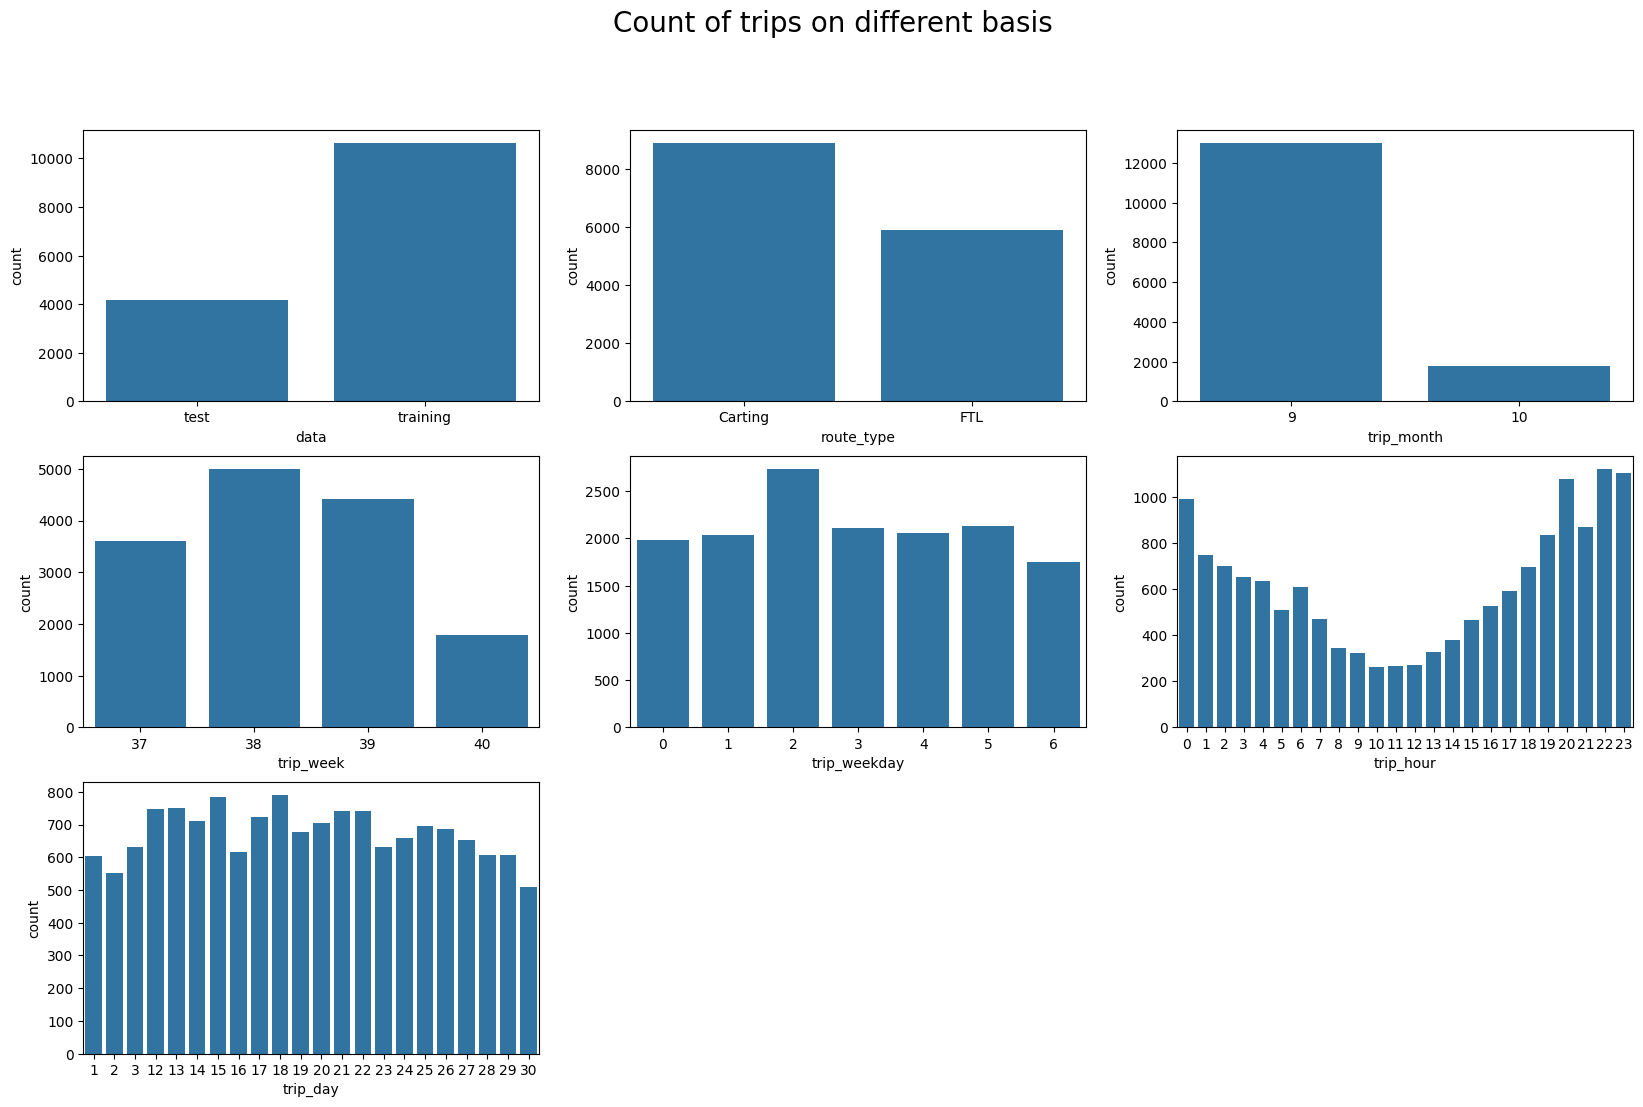

In [ ]:
plot_col=['data','route_type' , 'trip_month', 'trip_week',
       'trip_weekday' ,'trip_hour', 'trip_day']
i=1
plt.figure(figsize=(20,12))
plt.suptitle("Count of trips on different basis", fontsize=20)
for col in plot_col:
  plt.subplot(3,3,i)
  sns.countplot(data=df,x=col)
  i+=1
plt.show()

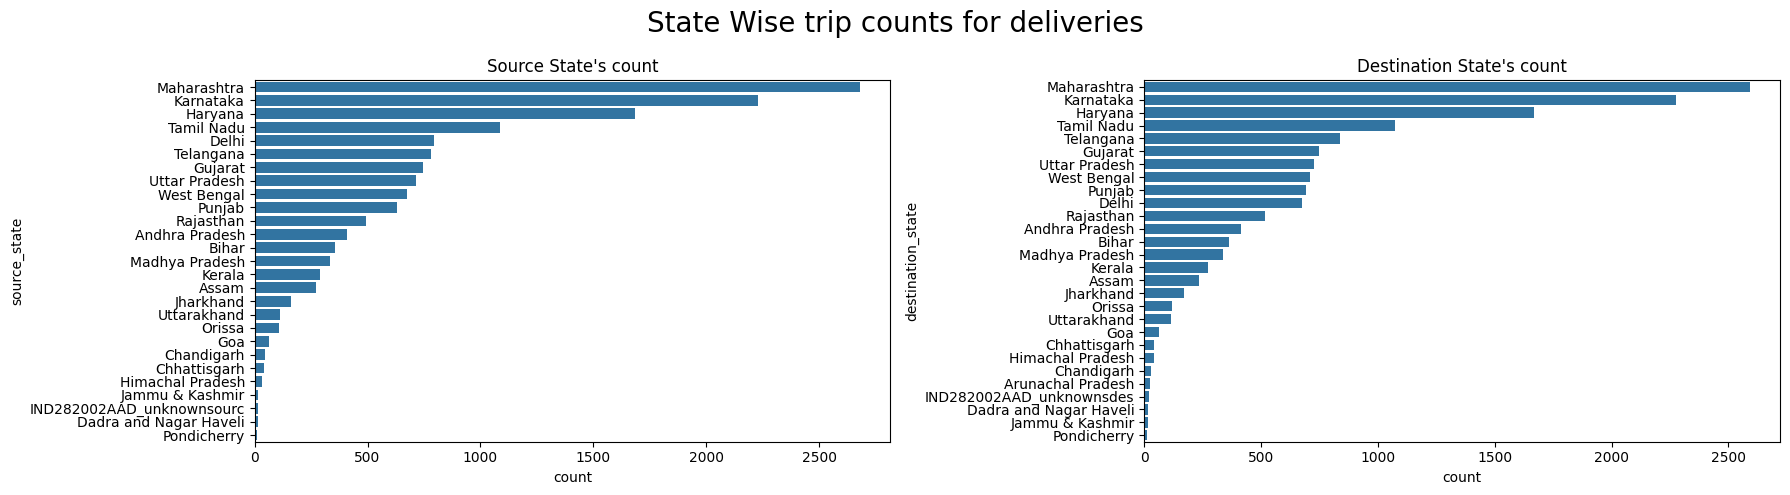

In [ ]:
plt.figure(figsize=(18,5))
plt.suptitle('State Wise trip counts for deliveries',fontsize=20)

plt.subplot(1,2,1)
plt.title("Source State's count")
source_counts=df['source_state'].value_counts()
source_counts=source_counts[source_counts>=10]
sns.barplot(y=source_counts.index,x=source_counts,orient='h')
plt.tight_layout()

plt.subplot(1,2,2)
plt.title("Destination State's count")
dest_counts=df['destination_state'].value_counts()
dest_counts=dest_counts[dest_counts>=10]
sns.barplot(y=dest_counts.index,x=dest_counts,orient='h')
plt.tight_layout()

plt.show()

<Axes: xlabel='data', ylabel='count'>

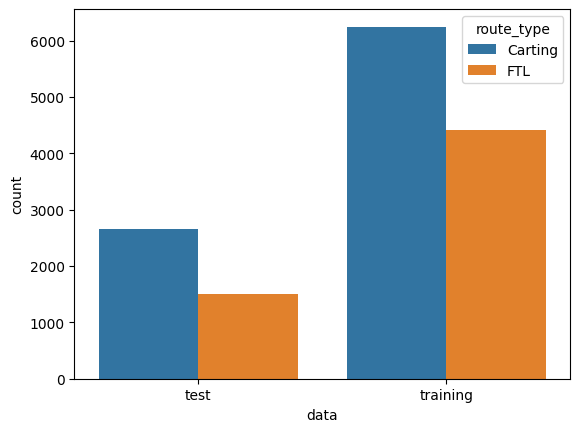

In [ ]:
sns.countplot(data=df,x='data',hue='route_type')

In [ ]:
num_cols=['start_scan_to_end_scan',
 'actual_time',
  'segment_actual_time',
 'osrm_time',
 'segment_osrm_time',
 'actual_distance_to_destination',
 'osrm_distance',
 'segment_osrm_distance']


### <font color='skyblue'>*Detecting Outliers*</font>


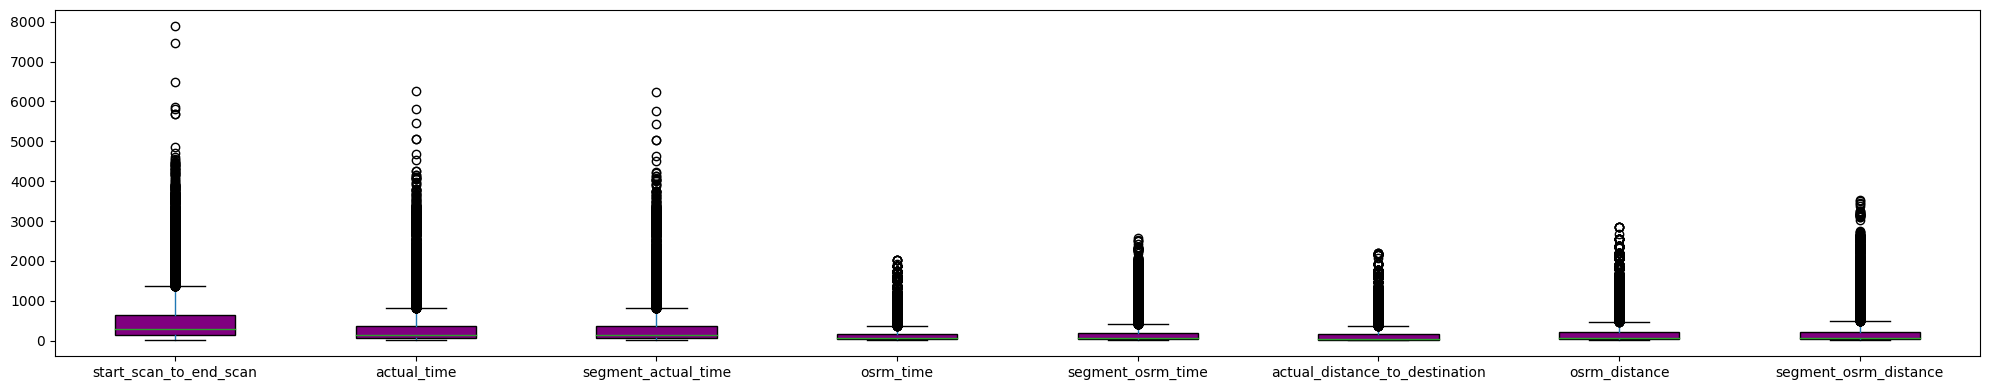

In [ ]:
plt.figure(figsize=(20,4))
df[num_cols].boxplot(grid=False,patch_artist=True, boxprops=dict(facecolor='purple'),color='')
plt.tight_layout()
plt.show()

As we can see there are various outliers in all columns on upper side of data which means many a times the delivery time is too high but as they are same with osrm too so it is not a high concern because it may be a reason for more distance area too as indicated by distance outliers.

In [ ]:
q1=df[num_cols].quantile(0.25)
q3=df[num_cols].quantile(0.75)
upper_whisker=(q3+(q3-q1)*1.5)
upper_whisker
for i in range(len(num_cols)):

  outlier=df[df[num_cols[i]]>upper_whisker[i]]
# q1,q3,upper_whisker
  print(f'Outliers for column {num_cols[i]:<35} = {len(outlier)}-------> This is {round((len(outlier)/len(df))*100,2)} % of dataset.')

Outliers for column start_scan_to_end_scan              = 1267-------> This is 8.55 % of dataset.
Outliers for column actual_time                         = 1643-------> This is 11.09 % of dataset.
Outliers for column segment_actual_time                 = 1643-------> This is 11.09 % of dataset.
Outliers for column osrm_time                           = 1517-------> This is 10.24 % of dataset.
Outliers for column segment_osrm_time                   = 1492-------> This is 10.07 % of dataset.
Outliers for column actual_distance_to_destination      = 1449-------> This is 9.78 % of dataset.
Outliers for column osrm_distance                       = 1526-------> This is 10.3 % of dataset.
Outliers for column segment_osrm_distance               = 1548-------> This is 10.45 % of dataset.


We can see that outliers are too much approx 10 % of data so they are not outliers basically but the data itself as 10 % of data is not outliers but business only. It may be required to have long route deliveries. So I am not removing them in original data just showing it as different dataframe<br><br>
### <font color='skyblue'>*Treating Outliers*</font>


In [ ]:
df_outliers=df[num_cols]
df_outliers[num_cols]=np.clip(df[num_cols],0,upper_whisker,axis=1)

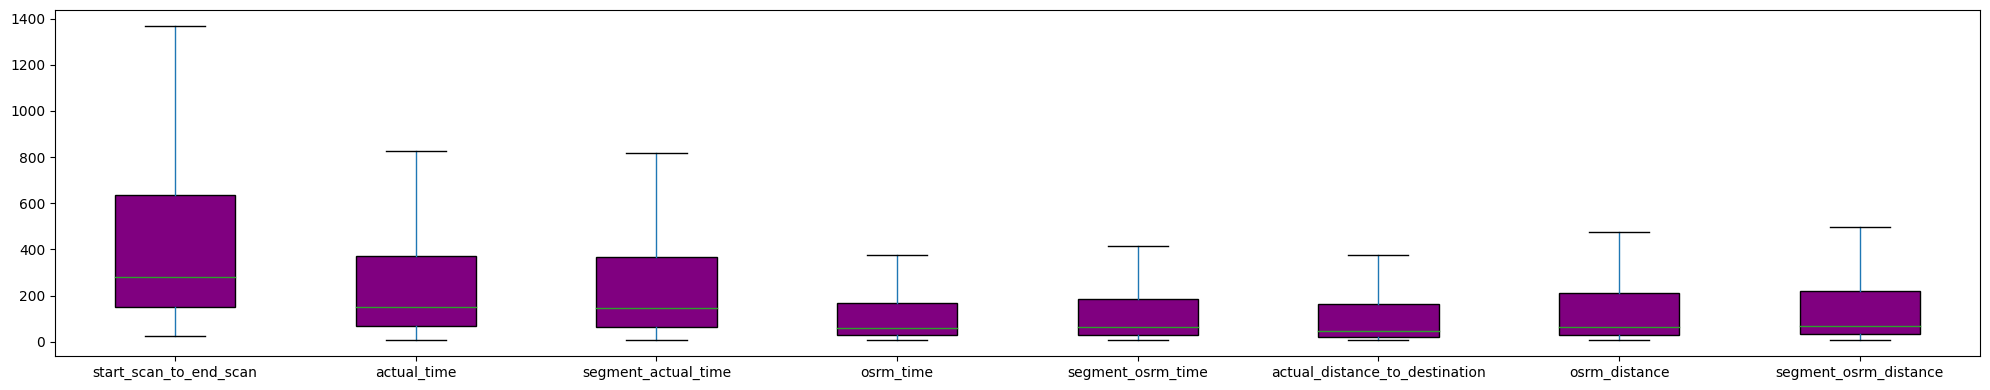

In [ ]:
plt.figure(figsize=(20,4))
df_outliers[num_cols].boxplot(grid=False,patch_artist=True, boxprops=dict(facecolor='purple'),color='')
plt.tight_layout()
plt.show()

### <font color='skyblue'>*Finding difference between actual and osrm time*</font>


<Figure size 2000x400 with 0 Axes>

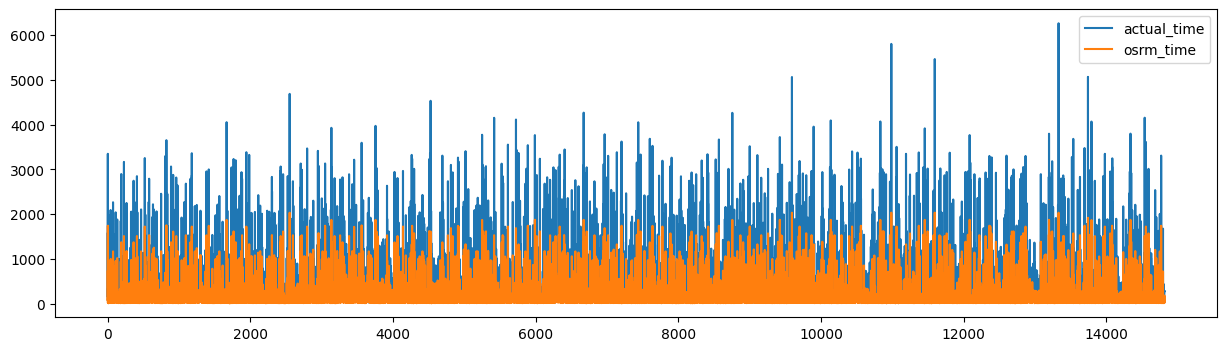

In [ ]:
plt.figure(figsize=(20,4))
ax=df[['actual_time','osrm_time']].plot(kind='line')
ax.figure.set_size_inches(15, 4)
plt.show()

<Figure size 2000x400 with 0 Axes>

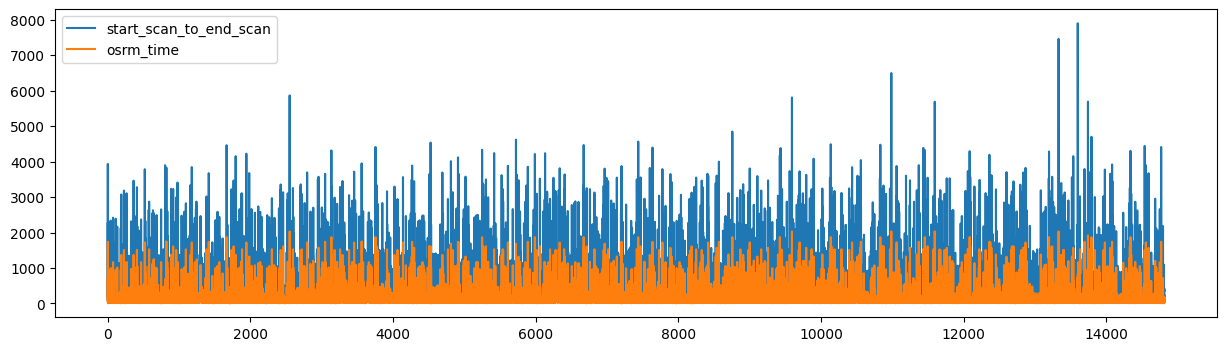

In [ ]:
plt.figure(figsize=(20,4))
ax=df[['start_scan_to_end_scan','osrm_time']].plot(kind='line')
ax.figure.set_size_inches(15, 4)
plt.show()

We can see the actual time is much more than the osrm time which should not be the case for best logistics.<br>
If we compare the start to scan time, the difference is more wider.

### <font color='skyblue'>*Finding routes where difference between actual and osrm time is more than 1 day*</font>

In [ ]:
# lets check  out the routes where such difference is high
df_lag=df[df['actual_time']>df['osrm_time']+1440][['source_state','source_city','destination_state','destination_city']].reset_index()
df_lag
# checking for more than 1 day difference only

,index,source_state,source_city,destination_state,destination_city
0,2,Karnataka,Bengaluru,Punjab,Chandigarh
1,190,West Bengal,Kolkata,Karnataka,Bengaluru
2,228,Haryana,Gurgaon,Karnataka,Bengaluru
3,520,Punjab,Chandigarh,Karnataka,Bengaluru
4,805,West Bengal,Kolkata,Assam,Guwahati
...,...,...,...,...,...
176,14349,Maharashtra,Bhiwandi,West Bengal,Kolkata
177,14538,Haryana,Gurgaon,Karnataka,Bengaluru
178,14555,Punjab,Chandigarh,Karnataka,Bengaluru
179,14592,Karnataka,Bengaluru,Delhi,Delhi


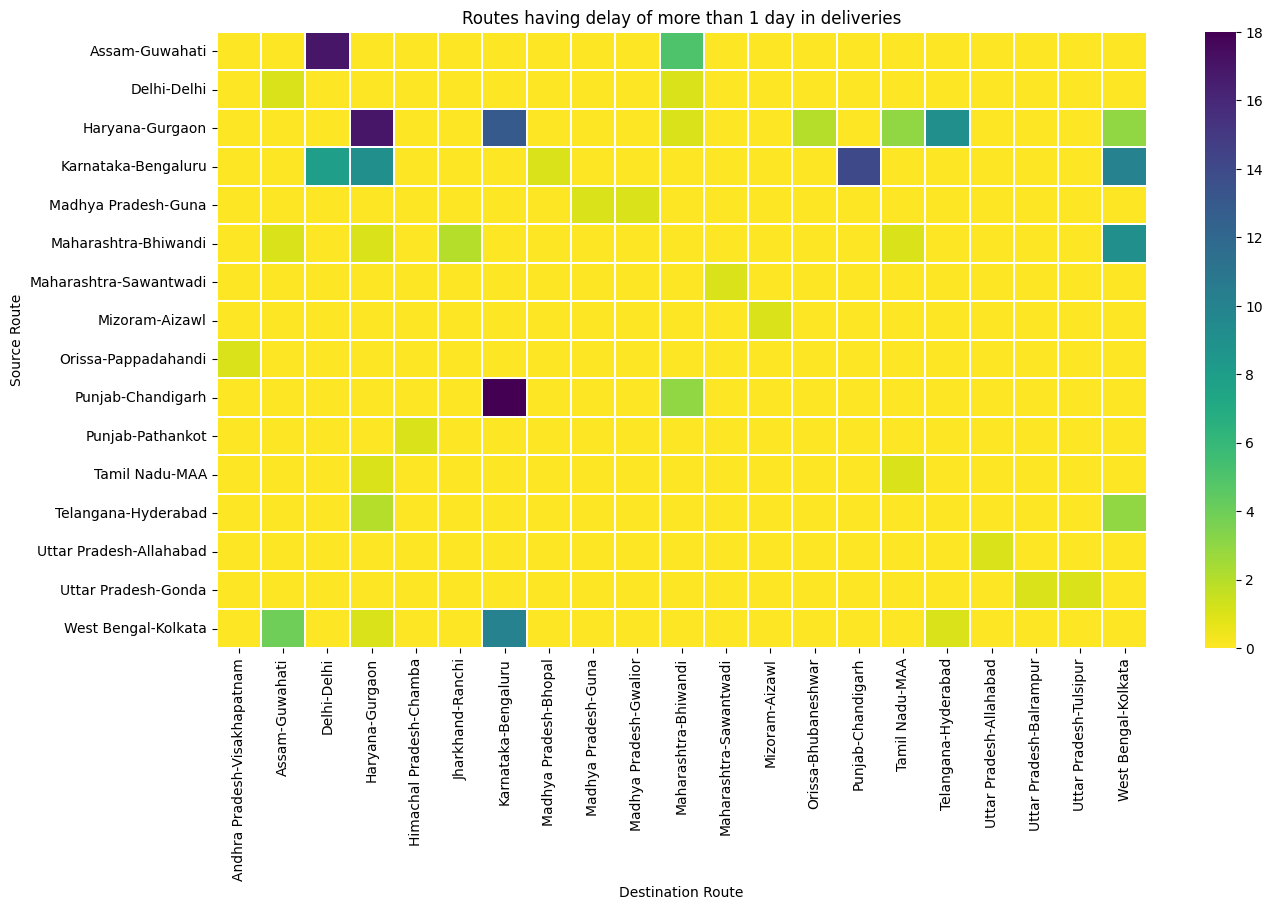

In [ ]:
df_cross=pd.crosstab(index=[df_lag['source_state'],df_lag['source_city']],columns=[df_lag['destination_state'],df_lag['destination_city']])
plt.figure(figsize=(15,8))
plt.title('Routes having delay of more than 1 day in deliveries')
sns.heatmap(df_cross,cmap='viridis_r',linewidths=0.01)
plt.ylabel("Source Route")
plt.xlabel("Destination Route")
plt.show()

### <font color='skyblue'>*Finding busiest corridor*</font>


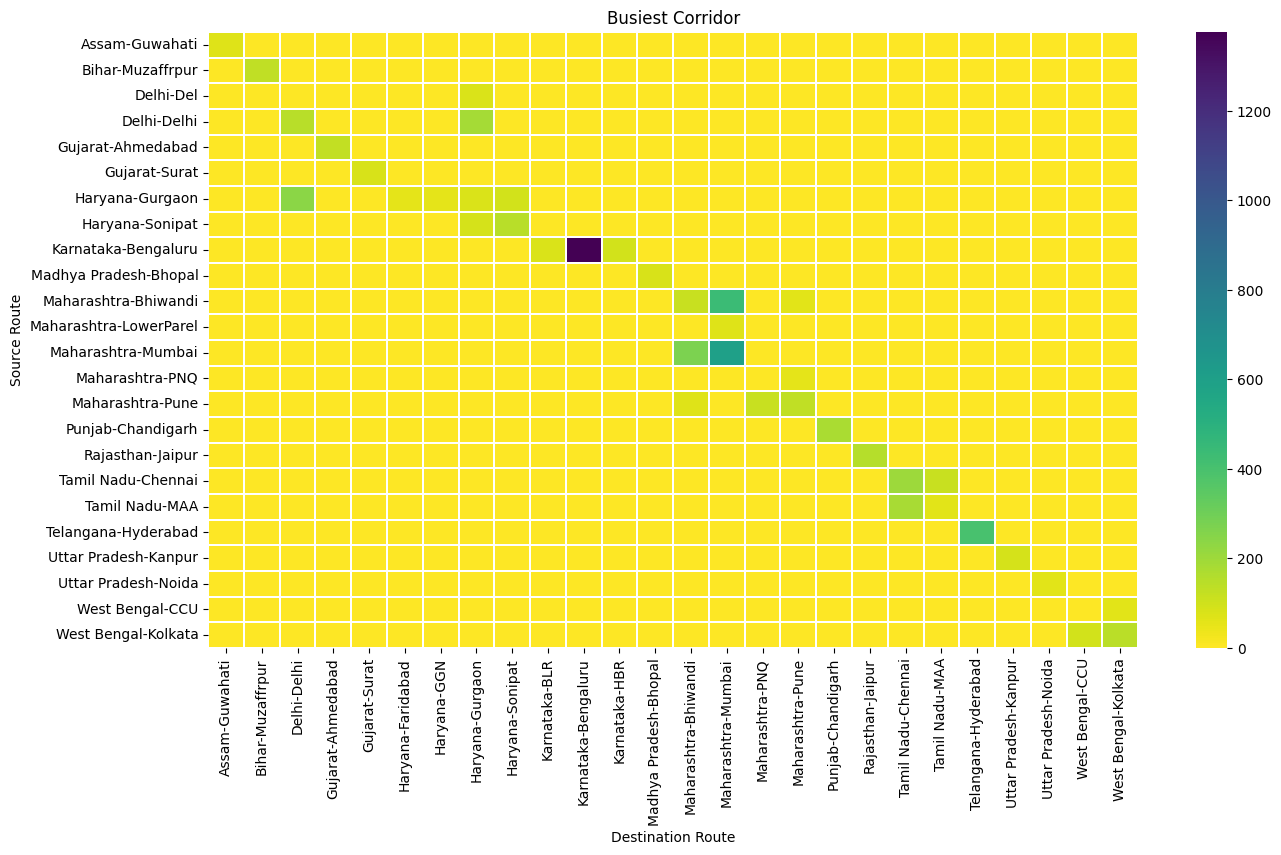

In [ ]:
df_cross=df[['source_state','source_city','destination_state','destination_city']].value_counts()
df_cross1=df_cross[df_cross.values>50].reset_index()
df_cross1=df_cross1.pivot_table(index=['source_state','source_city'],columns=['destination_state','destination_city'],values='count',fill_value=0)
plt.figure(figsize=(15,8))
plt.title('Busiest Corridor')
sns.heatmap(df_cross1,cmap='viridis_r',linewidths=0.01)
plt.ylabel("Source Route")
plt.xlabel("Destination Route")
plt.show()


<Figure size 2000x400 with 0 Axes>

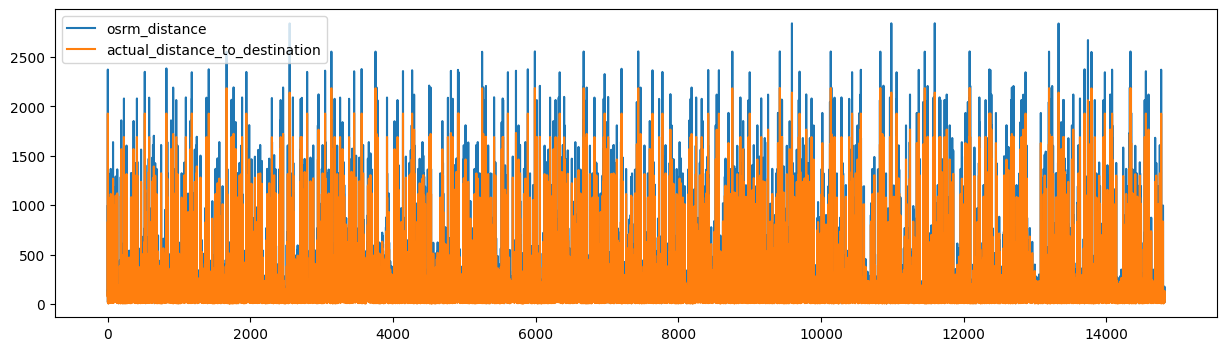

In [ ]:
plt.figure(figsize=(20,4))
ax=df[['osrm_distance','actual_distance_to_destination']].plot(kind='line')
ax.figure.set_size_inches(15, 4)
plt.show()

This is good that actual distance the deliveries are taking are less than osrm distance as it may reduce cost but the time taken is still more is not right.

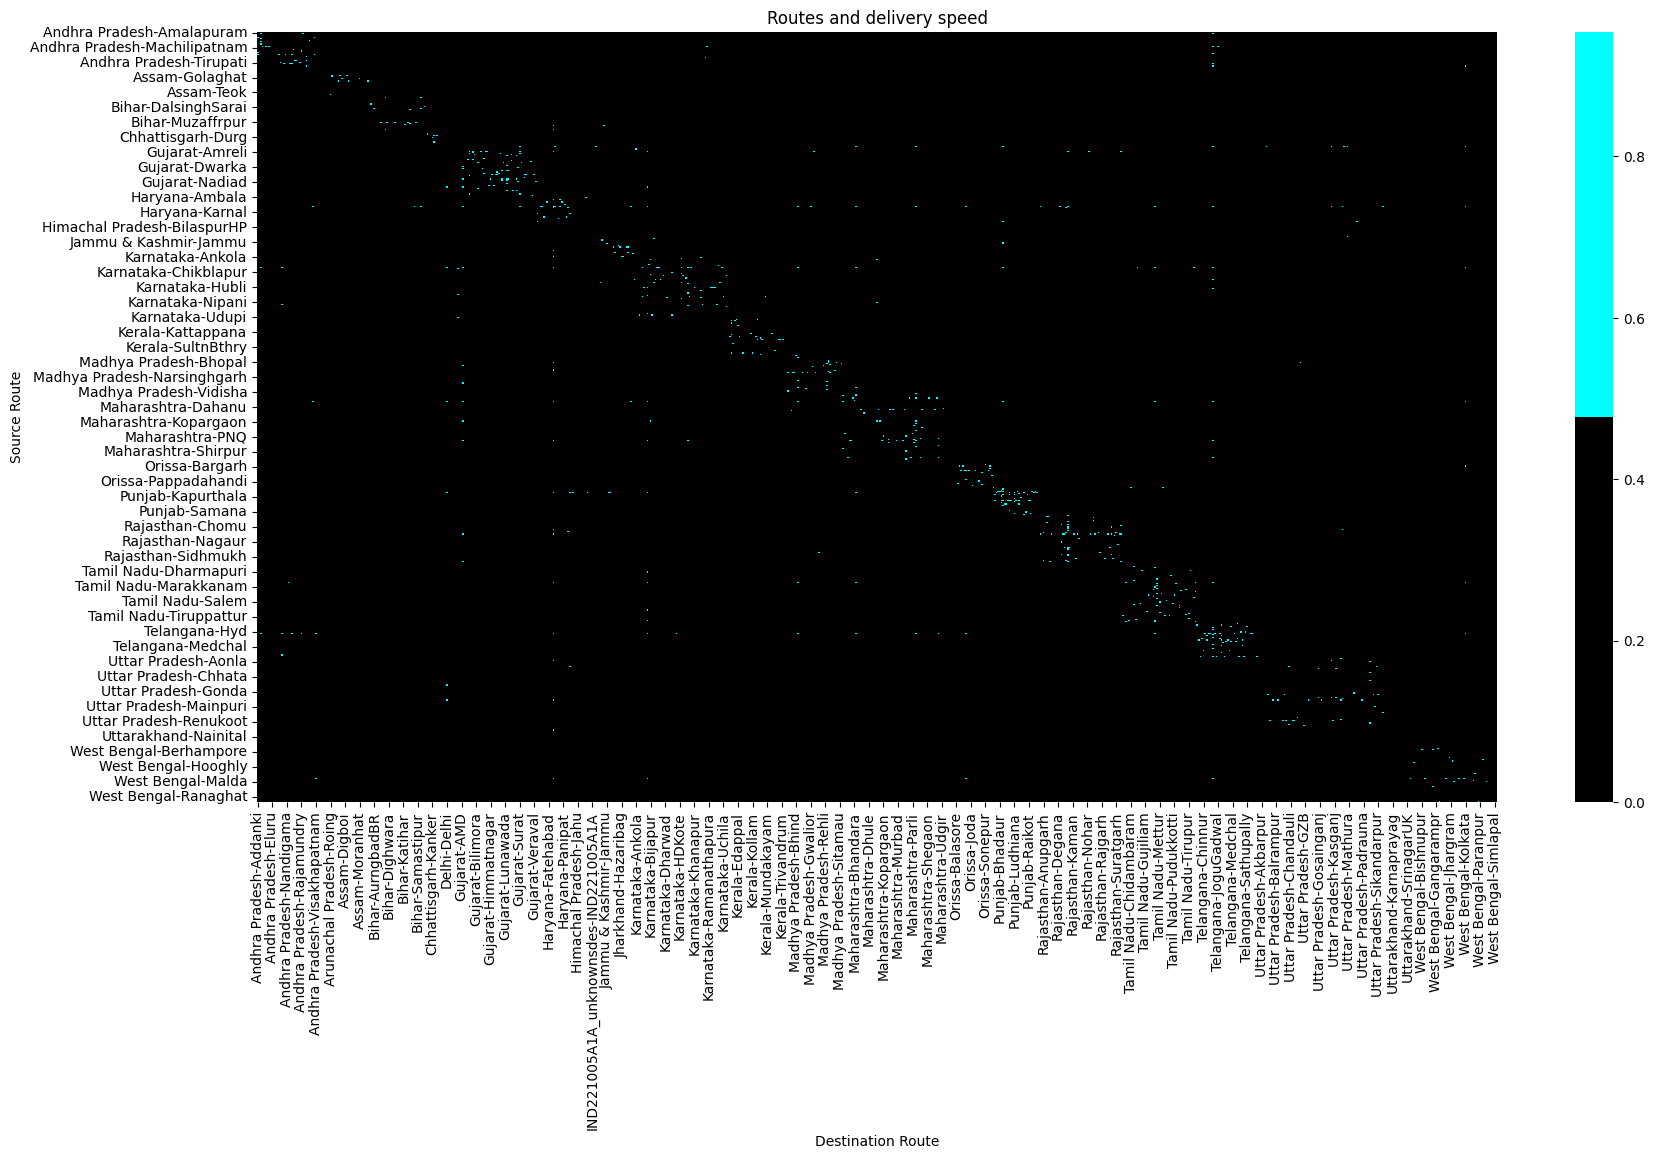

In [ ]:
df1=df.groupby(['source_state','source_city','destination_state','destination_city']).agg({'actual_distance_to_destination':sum,'actual_time':'sum'})
df1['speed']=df1['actual_distance_to_destination']/df1['actual_time']
df_cross1=df1.pivot_table(index=['source_state','source_city'],columns=['destination_state','destination_city'],values='speed',fill_value=0)
plt.figure(figsize=(20,10))
plt.title('Routes and delivery speed')
sns.heatmap(df_cross1,cmap=['black','cyan'])
plt.ylabel("Source Route")
plt.xlabel("Destination Route")
plt.show()

## <font color='skyblue' size=5>*Hypothesis Testing*</font>


Computing the significant difference between <font color='skyblue' size=5>actual_time -- osrm_time.</font> <br><br>
**STEP-1 : Set up Null Hypothesis**

Null Hypothesis ( H0 ) - actual_time is not greater than osrm_time (Expected total trip time).

Alternate Hypothesis ( HA ) - actual_time is greater than osrm_time (Expected total trip time).
<br><br>
**STEP-2 : Setting up Confidence Level**
Lets assume the confidence level to be 95 % so our alpha will be **0.05**
<br><br>
**STEP-3 : Choosing the distribution and test Statistics**
As we have only near to 20 days sample data, it doesnt makes sense to check normality of sample data but as we know almost every population distribution in world follows the normal distribution we are assuming it.<br>
AS we dont know the population parameters doing testing with **T Statistics**
<br><br>
**STEP-4 : Which Tail**<br>
We are trying to find the difference between 2 columns so assuming it to be right tail.

**STEP-5 : Computing p value**



In [ ]:
ttest,pval=ttest_ind(df['actual_time'],df['osrm_time'],alternative='greater')
print(f"P Value is {pval}\nAlpha is 0.05")
alpha=0.05
if pval<=alpha:
  print("We reject the null hypothesis and concludes that actual_time is significantly greater than osrm_time.")
else:
  print("Fail to reject the null Hypothesis. actual_time is not statistically greater than osrm_time")

P Value is 0.0
Alpha is 0.05
We reject the null hypothesis and concludes that actual_time is significantly greater than osrm_time.


Computing the significant difference between <font color='skyblue' size=5 >actual_time -- segment_actual_time.</font> <br><br>
**STEP-1 : Set up Null Hypothesis**

Null Hypothesis ( H0 ) - actual_time is not statistically different than segment_actual_time.

Alternate Hypothesis ( HA ) - actual_time is statistically different than segment_actual_time..
<br><br>
**STEP-2 : Setting up Confidence Level**
Lets assume the confidence level to be 95 % so our alpha will be **0.05**
<br><br>
**STEP-3 : Choosing the distribution and test Statistics**
As we have only near to 20 days sample data, it doesnt makes sense to check normality of sample data but as we know almost every population distribution in world follows the normal distribution we are assuming it.<br>
AS we dont know the population parameters doing testing with **T Statistics**
<br><br>
**STEP-4 : Which Tail**
We are trying to find the difference between 2 columns so assuming it to be two tail test.

**STEP-5 : Computing p value**



In [ ]:
ttest,pval=ttest_ind(df['actual_time'],df['segment_actual_time'])
print(f"P Value is {'%1.4f'%pval}\nAlpha is 0.05")
alpha=0.05
if pval<=alpha:
  print("We reject the null hypothesis and concludes that actual_time is significantly different than segment_actual_time.")
else:
  print("Fail to reject the null Hypothesis. actual_time is not statistically different than segment_actual_time.")

P Value is 0.6284
Alpha is 0.05
Fail to reject the null Hypothesis. actual_time is not statistically different than segment_actual_time.


So, we can drop one of these two column to feed data into ML model.
<br><br>

Computing the significant difference between <font color='skyblue' size=5 >osrm_distance -- segment_osrm_distance.</font> <br><br>
**STEP-1 : Set up Null Hypothesis**

Null Hypothesis ( H0 ) - osrm_distance is not statistically different than segment_osrm_distance.

Alternate Hypothesis ( HA ) - osrm_distance is statistically different than segment_osrm_distance.
<br><br>
**STEP-2 : Setting up Confidence Level**
Lets assume the confidence level to be 95 % so our alpha will be **0.05**
<br><br>
**STEP-3 : Choosing the distribution and test Statistics**
As we have only near to 20 days sample data, it doesnt makes sense to check normality of sample data but as we know almost every population distribution in world follows the normal distribution we are assuming it.<br>
AS we dont know the population parameters doing testing with **T Statistics**
<br><br>
**STEP-4 : Which Tail**
We are trying to find the difference between 2 columns so assuming it to be two tail test.

**STEP-5 : Computing p value**



In [ ]:
tstat,pval=ttest_ind(df['osrm_distance'],df['segment_osrm_distance'])
print(f"P Value is {pval}\nAlpha is 0.05")
alpha=0.05
if pval<=alpha:
  print("We reject the null hypothesis and concludes that osrm_distance is significantly different than segment_osrm_distance.")
else:
  print("Fail to reject the null Hypothesis. osrm_distance is not statistically different than segment_osrm_distance.")

P Value is 7.840520928201551e-05
Alpha is 0.05
We reject the null hypothesis and concludes that osrm_distance is significantly different than segment_osrm_distance.


Computing the significant difference between <font color='skyblue' size=5 >osrm_time -- segment_osrm_time.</font> <br><br>
**STEP-1 : Set up Null Hypothesis**

Null Hypothesis ( H0 ) - osrm_time is not statistically different than segment_osrm_time.

Alternate Hypothesis ( HA ) - osrm_time is statistically different than segment_osrm_time..
<br><br>
**STEP-2 : Setting up Confidence Level**
Lets assume the confidence level to be 95 % so our alpha will be **0.05**
<br><br>
**STEP-3 : Choosing the distribution and test Statistics**
As we have only near to 20 days sample data, it doesnt makes sense to check normality of sample data but as we know almost every population distribution in world follows the normal distribution we are assuming it.<br>
AS we dont know the population parameters doing testing with **T Statistics**
<br><br>
**STEP-4 : Which Tail**
We are trying to find the difference between 2 columns so assuming it to be two tail test.

**STEP-5 : Computing p value**



In [ ]:
ttest_ind(df['osrm_time'],df['segment_osrm_time'])
print(f"P Value is {pval}\nAlpha is 0.05")
alpha=0.05
if pval<=alpha:
  print("We reject the null hypothesis and concludes that osrm_time is significantly different than segment_osrm_time.")
else:
  print("Fail to reject the null Hypothesis. osrm_time is not statistically different than segment_osrm_time.")

P Value is 7.840520928201551e-05
Alpha is 0.05
We reject the null hypothesis and concludes that osrm_time is significantly different than segment_osrm_time.


We saw that except segment_actual_time and actual_time, all other columns are statistically different. so we can drop any of these two for machine learning.<br><br>
### <font color='skyblue'>*Feature engineering*</font>


In [ ]:
num_cols=(df.dtypes=='float')|(df.dtypes=='int')
num_cols=list(num_cols[num_cols].index)
num_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [ ]:
# converting numreic columns to standard scaling
df[num_cols]=StandardScaler().fit_transform(df[num_cols])
df.head()

,trip_uuid,data,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,source_city,source_place,destination_state,destination_city,destination_place,trip_hour,trip_day,trip_month,trip_week,trip_weekday
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2.623556,2.162082,2.146194,2.047577,2.120596,...,Bhopal,Trnsport,Haryana,Gurgaon,Bilaspur,0,12,9,37,2
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,-0.532588,-0.298952,-0.381473,-0.344150,-0.323634,...,Tumkur,Veersagr,Karnataka,Chikblapur,ShntiSgr,0,12,9,37,2
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,5.164867,5.772921,5.325817,5.817588,5.844580,...,Bengaluru,Nelmngla,Punjab,Chandigarh,Mehmdpur,0,12,9,37,2
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,-0.654036,-0.482369,-0.531102,-0.539469,-0.500108,...,Mumbai,Hub,Maharashtra,Mumbai,MiraRd,0,12,9,37,2
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,0.282635,-0.121265,-0.028775,-0.163573,-0.157274,...,Bellary,Bellary,Karnataka,Bellary,Bellary,0,12,9,37,2


In [ ]:
# performing one hot encoding on data and route type columns as they have 2 categories only
cat_cols=['data','route_type']
encoder = OneHotEncoder(sparse=False)

encoded_data=encoder.fit_transform(df[cat_cols])
# created one hot encoder data

encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(cat_cols))
# converted one hot encoded data with categories name as column name
df = pd.concat([df, encoded_df], axis=1)
# concating the original df with this encoded columns
df.drop(columns=['data','route_type'],inplace=True)
df.head()


,trip_uuid,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,...,destination_place,trip_hour,trip_day,trip_month,trip_week,trip_weekday,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2.623556,2.162082,2.146194,2.047577,2.120596,2.145957,2.629468,...,Bilaspur,0,12,9,37,2,0.0,1.0,0.0,1.0
1,trip-153671042288605164,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,-0.532588,-0.298952,-0.381473,-0.344150,-0.323634,-0.382845,-0.368643,...,ShntiSgr,0,12,9,37,2,0.0,1.0,1.0,0.0
2,trip-153671043369099517,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,5.164867,5.772921,5.325817,5.817588,5.844580,5.309205,5.595785,...,Mehmdpur,0,12,9,37,2,0.0,1.0,0.0,1.0
3,trip-153671046011330457,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,-0.654036,-0.482369,-0.531102,-0.539469,-0.500108,-0.530223,-0.524430,...,MiraRd,0,12,9,37,2,0.0,1.0,1.0,0.0
4,trip-153671052974046625,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,0.282635,-0.121265,-0.028775,-0.163573,-0.157274,-0.025182,-0.209676,...,Bellary,0,12,9,37,2,0.0,1.0,0.0,1.0


### <font color='skyblue'>*Business Insights and Analysis *</font>

- 72% of data is Training data and  28% testing.
- 60% deliveries are carting based while 40 % is Full truck loading deliveries.
- Most orders went from and to <font color='skyblue'>Maharashtra</font> followed by  <font color='skyblue'>Karnataka</font> and  <font color='skyblue'>Haryana</font> while the least from Nagaland, Mizoram and Arunachal Pradesh.
- The least deliveries were made to Tripura, Nagaland and Daman & Diu.
- If we see from city perspective, the <font color='skyblue'>Bengalauru</font> followed by <font color='skyblue'>Gurgaon</font> and  <font color='skyblue'>Mumbai</font> are cities from where maximum deliveries were sent.
- And they were sent most to <font color='skyblue'>Bengaluru</font> followed by <font color='skyblue'>Mumbai</font> and <font color='skyblue'>Gurgaon</font>.
- if we talk about specific places most deliveries were out from<font color='skyblue'> Gurgaon-Bilaspur, Bengaluru- Nelmngla and Bhiwandi-Mankoli </font> area and to same area too in terms of receipts of deliveries with little up and down.
- As we have data only from 12 sept, 2018 to 3 October, 2018 which is less than a month, we can't decide about some days but among the given data the most orders were made in September and comparatively less in starting days of October and ending days of September.
- Most trips were created during night hours between  8:00 PM to 1:00 AM as compared to day time.
- Most orders were made on Mondays while least on Sundays.
- Cant comment on month wise data but it seems a high possibility that there are less orders in month start (need more data to validate).
- The delay in deliveries are mainly at routes:
1. <font color='skyblue'>Chandigarh -- Bengaluru </font>
2. <font color='skyblue'>Guwahati -- Delhi</font>
3. <font color='skyblue'>Gurgaon -- Gurgaon</font>
4. <font color='skyblue'>Gurgaon -- Bengaluru</font>
5. <font color='skyblue'>Kolkata -- Bengaluru</font>

- We can see the busiest corridors are within a state and city itself which means that we are lacking with intra city and intra state deliveries  as they are taking more times than osme too.
- The highest speed of delivery is for destination <font color='skyblue'>Delhi, Hyderabad, Telangana</font> and <font color='skyblue'>Ahmedabad</font>

### <font color='skyblue'>*Recommendations*</font>
- Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results. If it is working fine, there is a possibility that drivers taking shorter distance to reduce cost but it is resulting in more time due to inferiore roads etc. So, need to find and work on that.
- Actual time taking in deliveries are very high. The reason can be the more resting period and no enough transports available. We must ensure proper transpor tfacility with 2 drivers at lon routes so that the deliveries can be done without delay at high speed.
- osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time. to increase customer satisfaction.
- Only 1504 unique route ids shows deliveries are repeated at same routes as high as 1812 times to a single route in a period of less than 22 days is surely a positive sign.
- Need to ensure more speedy deivery in those routes like Bengaluru to Chandigarh, Kolkata, Gurgaon etc by ensuring free loaded trucks to be sent directly rather than stopping in between.
- Same trip_uuid is repeated 101 times shows its not a good sign to send so many deliveries in between as will lead to late deliveries, try to avoid these kind of carting trucks as can lead to lose of customers.
- We have seen that most of the deliveries are within same state and cities too where speed of delivery is high but less than expected time. so need to ensure local area deliveries via two wheeleres riders etc.
- We should attract more customers in routes where we have not much high deliveries like from Orrisa, Uttarakhand, Jharkhand etc to ensure better coverage of area and as these are mid routes having more deliveries from here can also lead to more flt to nearby routes and more speedy deliveries.
